# Test Hypercubic Lattice

In [1]:
using TightBindingLattice
using Plots

Draw function

In [2]:
function draw_hypercube(hypercube ::HypercubicLattice)
    coordinates = hcat(hypercube.coordinates...)
    xlim = (minimum(coordinates[1,:]) - 3.5, maximum(coordinates[1,:]) + 3.5)
    ylim = (minimum(coordinates[2,:]) - 3.5, maximum(coordinates[2,:]) + 3.5)

    boundary = let
        r0 = [0,0]
        r1 = hypercube.scale_matrix[:,1]
        r2 = hypercube.scale_matrix[:,2]
        hcat(r0, r1, r1 .+ r2, r2, r0)
    end
    p = plot(boundary[1,:], boundary[2,:], label="")

    for Ri in Iterators.product(-1:1, -1:1)
        alpha = (Ri == (0,0)) ? 1.0 : 0.1
        Rr = hypercube.scale_matrix * [Ri...]
        scatter!(coordinates[1,:] .+ Rr[1], coordinates[2,:] .+ Rr[2], aspect_ratio=1, markersize=12, xlim=xlim, ylim=ylim, markeralpha=alpha, label="")
        annotation = []
        for i in 1:size(coordinates, 2)
            x = coordinates[1,i] + Rr[1]
            y = coordinates[2,i] + Rr[2]
            if xlim[1] < x < xlim[2] && ylim[1] < y < ylim[2]
                push!(annotation, (x, y, text("$i", 8, :black, :center)))
            end
        end
        if !isempty(annotation)
            annotation = [annotation...]
            annotate!(annotation)
        end
    end
    p
end

draw_hypercube (generic function with 1 method)

### (4,-4) x (4,4)

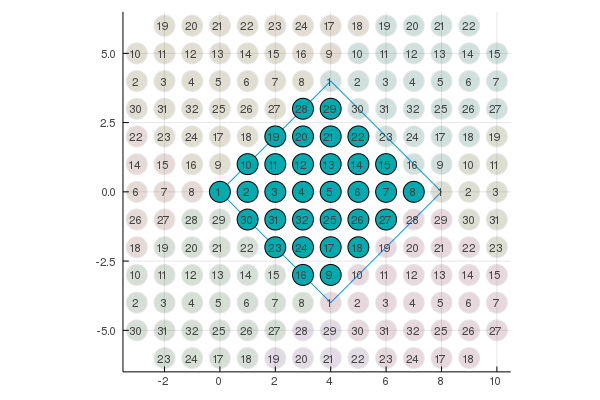

In [3]:
size_matrix = [ 4 4;
               -4 4]
hypercube = HypercubicLattice(size_matrix)
draw_hypercube(hypercube)

## All elements

In [4]:
for (i, c) in enumerate(hypercube.coordinates)
    println("$i : $c")
end

1 : [0, 0]
2 : [1, 0]
3 : [2, 0]
4 : [3, 0]
5 : [4, 0]
6 : [5, 0]
7 : [6, 0]
8 : [7, 0]
9 : [4, -3]
10 : [1, 1]
11 : [2, 1]
12 : [3, 1]
13 : [4, 1]
14 : [5, 1]
15 : [6, 1]
16 : [3, -3]
17 : [4, -2]
18 : [5, -2]
19 : [2, 2]
20 : [3, 2]
21 : [4, 2]
22 : [5, 2]
23 : [2, -2]
24 : [3, -2]
25 : [4, -1]
26 : [5, -1]
27 : [6, -1]
28 : [3, 3]
29 : [4, 3]
30 : [1, -1]
31 : [2, -1]
32 : [3, -1]


## Generators

In [5]:
translation_elements = [translation_element(hypercube, t) for t in hypercube.coordinates]
unit_translations = get_generators(hypercube)
println("Generators")
for it in unit_translations
    println("t(", it, ") = ", hypercube.coordinates[it], " (order = ", translation_elements[it].order, ")")
end

Generators
t(2) = [1, 0] (order = 8)
t(10) = [1, 1] (order = 4)


### (4,-1) x (1,4)

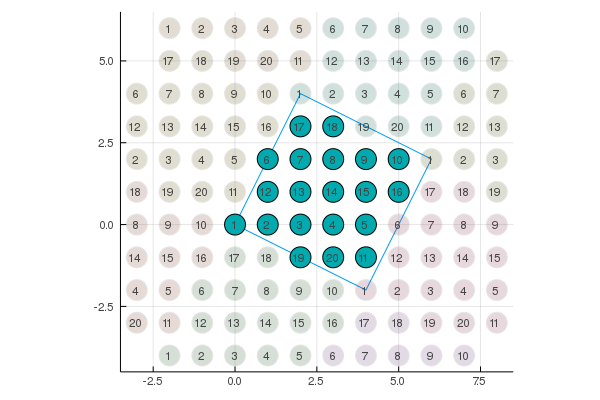

In [6]:
size_matrix = [ 4 2;
               -2 4]
hypercube = HypercubicLattice(size_matrix)
draw_hypercube(hypercube)

## All elements

In [7]:
for (i, c) in enumerate(hypercube.coordinates)
    println("$i : $c")
end

1 : [0, 0]
2 : [1, 0]
3 : [2, 0]
4 : [3, 0]
5 : [4, 0]
6 : [1, 2]
7 : [2, 2]
8 : [3, 2]
9 : [4, 2]
10 : [5, 2]
11 : [4, -1]
12 : [1, 1]
13 : [2, 1]
14 : [3, 1]
15 : [4, 1]
16 : [5, 1]
17 : [2, 3]
18 : [3, 3]
19 : [2, -1]
20 : [3, -1]


## Generators

In [8]:
translation_elements = [translation_element(hypercube, t) for t in hypercube.coordinates]
unit_translations = get_generators(hypercube)
for it in unit_translations
    println("t(", it, ") = ", hypercube.coordinates[it], " (order = ", translation_elements[it].order, ")")
end

t(2) = [1, 0] (order = 10)
t(14) = [3, 1] (order = 2)


*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*